# Introduction

Perceptron algorithm is a binary classification and only works when the data is linearly separable.  
The output is obtained by thresholding a linear function of the input: the parameters of the algorithm are the coefficients of this linear function.  
This will produce a hyperplane that separate classes.

Hyperplane define as a set of x that satisfy the function:

<center>

$H = {x: w^t x+b=0}$

</center>

Where $w$ is the weight and $b$ is bias

How to predict the classes:  
We look at the sign of the function  
<center>

$w^tx+b$

</center>

If the values is greater than $0$ then it belong to one class and if the value is less than $0$ it belong to the other one.

Learning both $w$ and $b$ is hard so we shifted everything up by adding one additional constand dimension, therefore:
<center>

$x$ becomes $\begin{bmatrix} \mathbf{x} \\ 1  \end{bmatrix}$  

$w$ become $\begin{bmatrix} \mathbf{w} \\ b  \end{bmatrix} $

</center>  

And we know that:

<center>

$\begin{bmatrix} \mathbf{x} \\ 1  \end{bmatrix}^\top \begin{bmatrix} \mathbf{w} \\ b  \end{bmatrix} = \mathbf{w}^\top \mathbf{x} + b$

</center>

This allow us to simplify the function for the hyperplane as:

<center>

$H = x: w^t x=0$

</center>

And the prediction output will be:

<center>

$w^tb$

</center>

How the algorithm work:  

1. Initialize $\vec{w}=0$
2. For every iteration set the number of error to 0
3. Going through all the point and make sure that $y  w^tx \geq 0$
4. If not we will update the weight $\vec{w}$ as $\vec{w}+y\vec{x}$ and record the number of our error $err = err+1$
5. If the amount of error is 0 at the end then the algorithm converge and it succeed in classify every point in our data

# Perceptron algorithm draft

In [ ]:
%pip install matplotlib

In [2]:
import numpy as np


def predict(X):
    return np.where(np.dot(np.transpose(weight),X) >= 0.0, 1, -1)


def perceptron(feature, label):
    weight = np.zeros(feature.shape[1])
    print(weight)
    errors = []
    while True:
        err = 0
        for x, y in zip(feature,label):
            ###The lecture from Cornell and the book we talk about approach and updat the weight different this code is follow what the prof said in the lecture video at cornell
            if y*(np.dot(np.transpose(weight),x)) <= 0:
                weight = weight + y * x
                #print(weight)
                err += 1
            #print(weight)
        print(err)
        errors.append(err)      
        if errors[-1] == 0:
            break
    print('Number of errors each iteration:' , errors)
    return weight

Loading a iris flower data set, this is just an example

In [3]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s,
header=None,
encoding='utf-8')
df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
from matplotlib import pyplot as plt
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

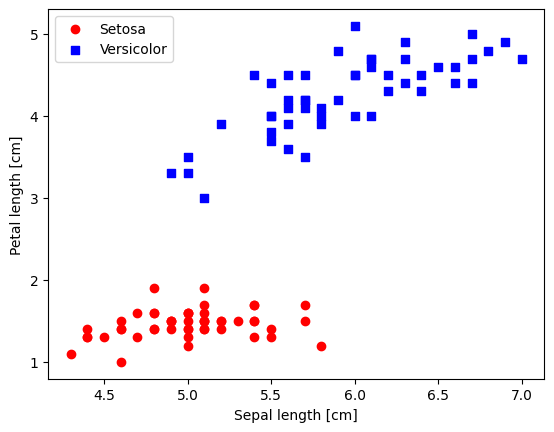

In [6]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Test the algorithm

In [6]:
weight = perceptron(X,y)
weight

[0. 0.]
2
2
3
2
1
0
Number of errors each iteration: [2, 2, 3, 2, 1, 0]


array([-4.3,  8.7])

In [7]:
def plot_decision_boundary(features, labels, weights):
    # Extract features in this case the sepal length and petal length
    x1 = features[:, 0]
    x2 = features[:, 1]

    # Plot the data points
    plt.scatter(x1[labels == -1], x2[labels == -1], marker='o', label='Setosa')
    plt.scatter(x1[labels == 1], x2[labels == 1], marker='x', label='Veriscolor')

    # Plot the decision boundary (hyperplane)
    x1_range = np.linspace(min(x1), max(x1), 100)
    x2_decision_boundary = - (weights[0] / weights[1]) * x1_range
    plt.plot(x1_range, x2_decision_boundary, color='red', label='Decision Boundary')

    plt.xlabel('Sepal length')
    plt.ylabel('Petal length')
    plt.legend()
    plt.show()

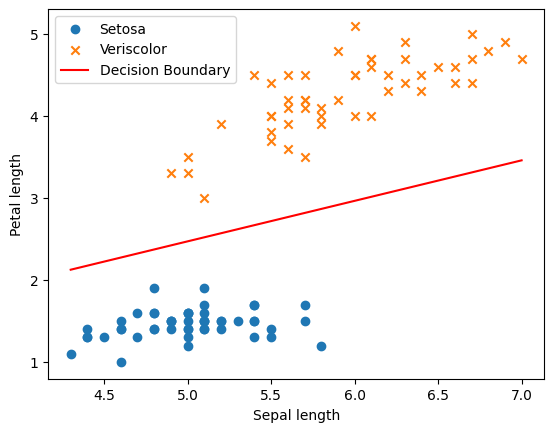

In [8]:
plot_decision_boundary(X,y,weight)

For the homework and the proof I am still planning how to get the student to know basic Python before going to implementation this algorithm

# Testing section
Choose a line, then select points randomly in the plane and categorize them based on whether they are one side or the other of the plane. Suppose we have the following set up

In [11]:
w = np.array([2.5,6.9])
w

array([2.5, 6.9])

In [46]:
#generate a list of random point
import random


def generate_random_pairs(n):
    pairs = []
    for i in range(n):
        x = random.uniform(-50, 50)
        y = random.uniform(-50, 50)
        pairs.append((x, y))
    return pd.DataFrame(pairs, columns=['x1', 'x2'])

In [47]:
point = generate_random_pairs(100)

In [48]:
point = point.iloc[0:100,[0,1]].values

In [69]:
#predicting the label
label = []
for value in point:
    if np.dot(np.transpose(w),value)>=0:
        label.append(1)
    else:    
        label.append(-1)
predict = np.array(label)

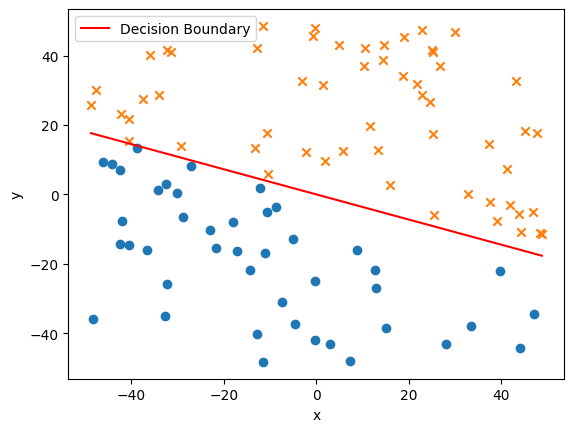

In [75]:
    # Extract features in this case the sepal length and petal length
x1 = point[:, 0]
x2 = point[:, 1]

    # Plot the data points
plt.scatter(x1[predict == -1], x2[predict == -1], marker='o')
plt.scatter(x1[predict == 1], x2[predict == 1], marker='x')


    # Plot the decision boundary (hyperplane)
x1_range = np.linspace(min(x1), max(x1), 100)
x2_decision_boundary = - (w[0] / w[1]) * x1_range
plt.plot(x1_range, x2_decision_boundary, color='red', label='Decision Boundary')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Perceptron algorithm on 3D

In [9]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
%pip install ipympl 


     ---------------------------------------- 0.0/511.6 kB ? eta -:--:--
      --------------------------------------- 10.2/511.6 kB ? eta -:--:--
     -- ---------------------------------- 41.0/511.6 kB 393.8 kB/s eta 0:00:02
     ---------- --------------------------- 143.4/511.6 kB 1.1 MB/s eta 0:00:01
     --------------------------------- ---- 450.6/511.6 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 511.6/511.6 kB 2.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


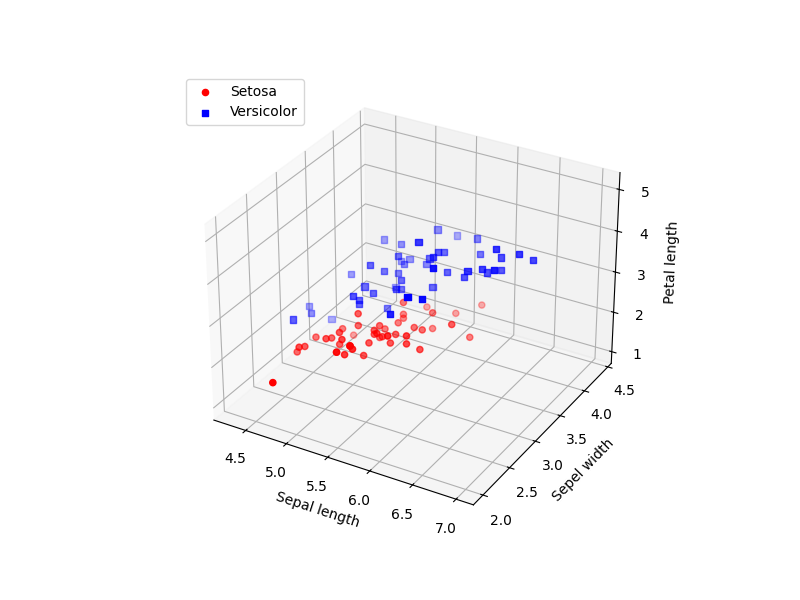

In [12]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# extract sepal length and petal lengt
X = df.iloc[0:100, [0, 1, 2]].values
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:50, 0], X[:50, 1], X[:50, 2], color='red', marker='o', label='Setosa')
ax.scatter(X[50:100, 0], X[50:100, 1], X[50:100, 2], color='blue', marker='s', label='Versicolor')
# Add labels to the axes
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepel width')
ax.set_zlabel('Petal length')
ax.legend(loc='upper left')
plt.show()

In [13]:
weight = perceptron(X,y)
weight

[0. 0. 0.]
2
2
2
1
0
Number of errors each iteration: [2, 2, 2, 1, 0]


array([-0.8, -4.7,  7.4])

In [20]:

def plot_decision_boundary3D(features, labels, weights):
    # Extract features in this case the sepal length and petal length
    x1 = features[:, 0]
    x2 = features[:, 1]
    x3 = features[:, 2]

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the data points
    ax.scatter(x1[labels == -1], x2[labels == -1], x3[labels == -1], marker='o', label='Setosa')
    ax.scatter(x1[labels == 1], x2[labels == 1], x3[labels == 1], marker='x', label='Veriscolor')

    # calculate the plane
    x1_range = np.linspace(min(x1), max(x1), 100)
    x2_range = np.linspace(min(x2), max(x2), 100)
    x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
    x3_decision_boundary = - (weights[0] / weights[2]) * x1_mesh - (weights[1] / weights[2]) * x2_mesh

    # Plot the decision boundary
    ax.plot_surface(x1_mesh, x2_mesh, x3_decision_boundary, alpha=0.5, color='red', label='Decision Boundary')

    # Add labels to the axes
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_zlabel('Petal length')
    ax.legend(loc='upper left')
    plt.show()



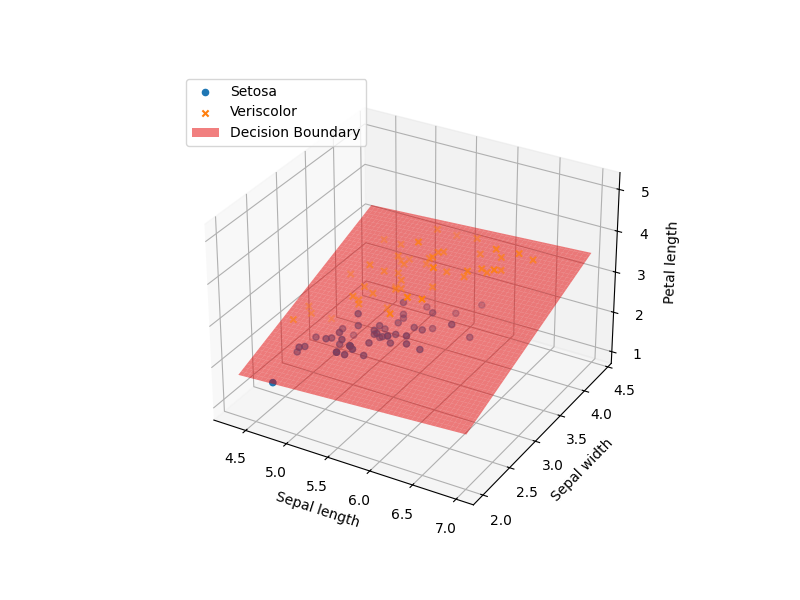

In [21]:
%matplotlib widget
plot_decision_boundary3D(X, y, weight)